In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

In [2]:
rna_binders_path = '../data/diversity_picking/ECFP6_set2/rna_binders_ECFP6_set2_diversity_picked.pkl'
rna_non_binders_path = '../data/diversity_picking/ECFP6_set2/rna_non_binders_ECFP6_set2_diversity_picked.pkl'
protein_binders_path = '../data/diversity_picking/ECFP6_set2/protein_binders_ECFP6_set2_diversity_picked.pkl'
protein_non_binders_path = '../data/diversity_picking/ECFP6_set2/protein_non_binders_ECFP6_set2_diversity_picked.pkl'

# load data
rna_binders_df = pd.read_pickle(rna_binders_path)
rna_non_binders_df = pd.read_pickle(rna_non_binders_path)
probes_drugs = pd.read_pickle(protein_binders_path)
zinc_dark_matter = pd.read_pickle(protein_non_binders_path)

In [3]:
# what are the count of each dataframe
print(f'RNA binders: {rna_binders_df.shape}')
print(f'RNA non-binders: {rna_non_binders_df.shape}')
print(f'Probes and drugs: {probes_drugs.shape}')
print(f'Zinc dark matter: {zinc_dark_matter.shape}')


RNA binders: (1961, 4)
RNA non-binders: (21882, 4)
Probes and drugs: (2276, 4)
Zinc dark matter: (24945, 4)


In [4]:
# reset indexes on the dataframes
all_dataframes = [rna_binders_df, rna_non_binders_df, probes_drugs, zinc_dark_matter]
for df in all_dataframes:
    df.reset_index(inplace=True, drop=True)

In [5]:
# from rdkit.Chem.Scaffolds import MurckoScaffold
# from rdkit import Chem


# def get_murcko_scaffold(mol):
#     try:
#         scaffold = MurckoScaffold.GetScaffoldForMol(mol)
#         scaffold = Chem.MolToSmiles(scaffold, canonical=True)
#     except ValueError:
#         scaffold = ""
#     return scaffold

# def get_csk_scaffold(mol):
#     try:
#         scaffold = MurckoScaffold.GetScaffoldForMol(mol)
#         scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
#         scaffold = MurckoScaffold.GetScaffoldForMol(scaffold)
#         scaffold = Chem.MolToSmiles(scaffold, canonical=True)
#     except ValueError:
#         scaffold = ""
#     return scaffold

In [6]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem

def get_murcko_scaffold(mol):
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        if scaffold.GetNumAtoms() == 0:  # Checks if the scaffold is empty
            return Chem.MolToSmiles(mol, canonical=True)  # Return the SMILES of the whole molecule
        scaffold = Chem.MolToSmiles(scaffold, canonical=True)
    except ValueError:
        scaffold = ""
    return scaffold

def get_csk_scaffold(mol):
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        if scaffold.GetNumAtoms() == 0:  # Checks if the scaffold is empty
            return Chem.MolToSmiles(mol, canonical=True)  # Return the SMILES of the whole molecule
        scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
        scaffold = MurckoScaffold.GetScaffoldForMol(scaffold)
        scaffold = Chem.MolToSmiles(scaffold, canonical=True)
    except ValueError:
        scaffold = ""
    return scaffold


In [7]:
# add murcko scaffold column to each dataframe
rna_binders_df['Murcko_scafold'] = rna_binders_df['mol'].apply(get_murcko_scaffold)
rna_non_binders_df['Murcko_scafold'] = rna_non_binders_df['mol'].apply(get_murcko_scaffold)
probes_drugs['Murcko_scafold'] = probes_drugs['mol'].apply(get_murcko_scaffold)
zinc_dark_matter['Murcko_scafold'] = zinc_dark_matter['mol'].apply(get_murcko_scaffold)

rna_binders_df['CSK_scafold'] = rna_binders_df['mol'].apply(get_csk_scaffold)
rna_non_binders_df['CSK_scafold'] = rna_non_binders_df['mol'].apply(get_csk_scaffold)
probes_drugs['CSK_scafold'] = probes_drugs['mol'].apply(get_csk_scaffold)
zinc_dark_matter['CSK_scafold'] = zinc_dark_matter['mol'].apply(get_csk_scaffold)



In [8]:
# change staccold columns to string
rna_binders_df['Murcko_scafold'] = rna_binders_df['Murcko_scafold'].astype(str)
rna_non_binders_df['Murcko_scafold'] = rna_non_binders_df['Murcko_scafold'].astype(str)
# set the scaffold column to string
probes_drugs['Murcko_scafold'] = probes_drugs['Murcko_scafold'].astype(str)
zinc_dark_matter['Murcko_scafold'] = zinc_dark_matter['Murcko_scafold'].astype(str)




In [9]:
rna_binders_df.head(1)

,mol,smiles,ECFP6,source,Murcko_scafold,CSK_scafold
0,<rdkit.Chem.rdchem.Mol object at 0x7f77d35a4310>,Cc1ccc(CN(C)CC(=O)N2CCC(N3CCC(O)CC3)CC2)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",robin_b,O=C(CNCc1ccccc1)N1CCC(N2CCCCC2)CC1,C1CCC(CCCCC2CCC(C3CCCCC3)CC2)CC1


In [10]:
all_df = pd.concat([rna_binders_df, rna_non_binders_df, probes_drugs, zinc_dark_matter], ignore_index=True)
# check the smiles for empty strings
empty_smiles = all_df[all_df['Murcko_scafold'] == '']
print(f"Empty smiles: {empty_smiles.shape}")

Empty smiles: (0, 6)


In [11]:
all_df = pd.concat([rna_binders_df, rna_non_binders_df, probes_drugs, zinc_dark_matter], ignore_index=True)
# check the smiles for empty strings
empty_smiles = all_df[all_df['CSK_scafold'] == '']
print(f"Empty smiles: {empty_smiles.shape}")

Empty smiles: (0, 6)


In [12]:
# remove rows in zinc dark matter with empty scaffolds
zinc_dark_matter = zinc_dark_matter[zinc_dark_matter['Murcko_scafold'] != '']
zinc_dark_matter = zinc_dark_matter[zinc_dark_matter['CSK_scafold'] != '']

In [13]:
import os

# create folder scaffolds
if not os.path.exists('../output/scaffolds_set2'):
    os.makedirs('../output/scaffolds_set2')

In [14]:
# save pandas dataframes as pkl
rna_binders_df.to_pickle('../output/scaffolds_set2/rna_binders_scaffolds.pkl')
rna_non_binders_df.to_pickle('../output/scaffolds_set2/rna_non_binders_scaffolds.pkl')
probes_drugs.to_pickle('../output/scaffolds_set2/probes_drugs_scaffolds.pkl')
zinc_dark_matter.to_pickle('../output/scaffolds_set2/zinc_dark_matter_scaffolds.pkl')



In [15]:
# load the dataframes
rna_binders_df = pd.read_pickle('../output/scaffolds_set2/rna_binders_scaffolds.pkl')
rna_non_binders_df = pd.read_pickle('../output/scaffolds_set2/rna_non_binders_scaffolds.pkl')
probes_drugs = pd.read_pickle('../output/scaffolds_set2/probes_drugs_scaffolds.pkl')
zinc_dark_matter = pd.read_pickle('../output/scaffolds_set2/zinc_dark_matter_scaffolds.pkl')


In [16]:
# Count scaffold occurrences murcko sorted
rna_binders_scaffold_counts_murcko = rna_binders_df['Murcko_scafold'].value_counts()
rna_non_binders_scaffold_counts_murcko = rna_non_binders_df['Murcko_scafold'].value_counts()
probes_drugs_scaffold_counts_murcko = probes_drugs['Murcko_scafold'].value_counts()
zinc_dark_matter_scaffold_counts_murcko = zinc_dark_matter['Murcko_scafold'].value_counts()

 
# Count scaffold occurrences CSK sorted
rna_binders_scaffold_counts_csk = rna_binders_df['CSK_scafold'].value_counts()
rna_non_binders_scaffold_counts_csk = rna_non_binders_df['CSK_scafold'].value_counts()
probes_drugs_scaffold_counts_csk = probes_drugs['CSK_scafold'].value_counts()
zinc_dark_matter_scaffold_counts_csk = zinc_dark_matter['CSK_scafold'].value_counts()


In [17]:
# create a df from series Murcko
rna_binders_scaffold_counts_murcko = pd.DataFrame(rna_binders_scaffold_counts_murcko).reset_index()
rna_binders_scaffold_counts_murcko['source'] = 'RNA binders'
rna_non_binders_scaffold_counts_murcko = pd.DataFrame(rna_non_binders_scaffold_counts_murcko).reset_index()
rna_non_binders_scaffold_counts_murcko['source'] = 'RNA non-binders'
probes_drugs_scaffold_counts_murcko = pd.DataFrame(probes_drugs_scaffold_counts_murcko).reset_index()
probes_drugs_scaffold_counts_murcko['source'] = 'Probes & drugs'
zinc_dark_matter_scaffold_counts_murcko = pd.DataFrame(zinc_dark_matter_scaffold_counts_murcko).reset_index()
zinc_dark_matter_scaffold_counts_murcko['source'] = 'Zinc dark matter'


# create a df from series CSK
rna_binders_scaffold_counts_csk = pd.DataFrame(rna_binders_scaffold_counts_csk).reset_index()
rna_binders_scaffold_counts_csk['source'] = 'RNA binders'
rna_non_binders_scaffold_counts_csk = pd.DataFrame(rna_non_binders_scaffold_counts_csk).reset_index()
rna_non_binders_scaffold_counts_csk['source'] = 'RNA non-binders'
probes_drugs_scaffold_counts_csk = pd.DataFrame(probes_drugs_scaffold_counts_csk).reset_index()
probes_drugs_scaffold_counts_csk['source'] = 'Probes & drugs'
zinc_dark_matter_scaffold_counts_csk = pd.DataFrame(zinc_dark_matter_scaffold_counts_csk).reset_index()
zinc_dark_matter_scaffold_counts_csk['source'] = 'Zinc dark matter'


In [18]:
zinc_dark_matter_scaffold_counts_murcko

,Murcko_scafold,count,source
0,c1ccccc1,668,Zinc dark matter
1,c1ccncc1,129,Zinc dark matter
2,O=C(CNc1ccccc1)NCc1ccccc1,98,Zinc dark matter
3,C1CCNCC1,63,Zinc dark matter
4,c1cn[nH]c1,61,Zinc dark matter
...,...,...,...
19622,O=C(CCNC(=O)C(=O)c1ccc[nH]1)Nc1ccccc1,1,Zinc dark matter
19623,O=C(CCCc1ccccc1)N/N=C/c1ccccc1,1,Zinc dark matter
19624,O=C(NCCc1cc2ccccc2[nH]1)N1CCCS(=O)(=O)CC1,1,Zinc dark matter
19625,O=C(NCc1ccccc1)c1cn2ncccc2n1,1,Zinc dark matter


In [19]:
# drop index in all dfs if there is any
dfs = [rna_binders_scaffold_counts_murcko, rna_non_binders_scaffold_counts_murcko, probes_drugs_scaffold_counts_murcko, zinc_dark_matter_scaffold_counts_murcko,
       rna_binders_scaffold_counts_csk, rna_non_binders_scaffold_counts_csk, probes_drugs_scaffold_counts_csk, zinc_dark_matter_scaffold_counts_csk]

for df in dfs:
    if 'index' in df.columns:
        df.drop('index', axis=1, inplace=True)

In [20]:
# create a folder scaffold_analysis_output and save all the dataframes as csv
if not os.path.exists('../output/scaffold_analysis_output_set2'):
    os.makedirs('../output/scaffold_analysis_output_set2')
    
rna_binders_scaffold_counts_murcko.to_csv('../output/scaffold_analysis_output_set2/rna_binders_scaffold_counts_murcko.csv', index=False)
rna_non_binders_scaffold_counts_murcko.to_csv('../output/scaffold_analysis_output_set2/rna_non_binders_scaffold_counts_murcko.csv', index=False)
probes_drugs_scaffold_counts_murcko.to_csv('../output/scaffold_analysis_output_set2/probes_drugs_scaffold_counts_murcko.csv', index=False)
zinc_dark_matter_scaffold_counts_murcko.to_csv('../output/scaffold_analysis_output_set2/zinc_dark_matter_scaffold_counts_murcko.csv', index=False)
    
rna_binders_scaffold_counts_csk.to_csv('../output/scaffold_analysis_output_set2/rna_binders_scaffold_counts_csk.csv', index=False)
rna_non_binders_scaffold_counts_csk.to_csv('../output/scaffold_analysis_output_set2/rna_non_binders_scaffold_counts_csk.csv', index=False)
probes_drugs_scaffold_counts_csk.to_csv('../output/scaffold_analysis_output_set2/probes_drugs_scaffold_counts_csk.csv', index=False)
zinc_dark_matter_scaffold_counts_csk.to_csv('../output/scaffold_analysis_output_set2/zinc_dark_matter_scaffold_counts_csk.csv', index=False)


In [21]:
# create a df with 5 most occuring scaffolds from each dataset (Murcko)
rna_binders_scaffold_counts_murcko_top5 = rna_binders_scaffold_counts_murcko.head(5)
rna_non_binders_scaffold_counts_murcko_top5 = rna_non_binders_scaffold_counts_murcko.head(5)
probes_drugs_scaffold_counts_murcko_top5 = probes_drugs_scaffold_counts_murcko.head(5)
zinc_dark_matter_scaffold_counts_murcko_top5 = zinc_dark_matter_scaffold_counts_murcko.head(5)
 
 # create a df with 5 most occuring scaffolds from each dataset (CSK)
rna_binders_scaffold_counts_csk_top5 = rna_binders_scaffold_counts_csk.head(5)
rna_non_binders_scaffold_counts_csk_top5 = rna_non_binders_scaffold_counts_csk.head(5)
probes_drugs_scaffold_counts_csk_top5 = probes_drugs_scaffold_counts_csk.head(5)
zinc_dark_matter_scaffold_counts_csk_top5 = zinc_dark_matter_scaffold_counts_csk.head(5)

In [22]:
# sum of scaffolds counts for each dataset
rna_binders_sum_murcko = rna_binders_scaffold_counts_murcko['count'].sum()
rna_non_binders_sum_murcko = rna_non_binders_scaffold_counts_murcko['count'].sum()
probes_drugs_sum_murcko = probes_drugs_scaffold_counts_murcko['count'].sum()
zinc_dark_matter_sum_murcko = zinc_dark_matter_scaffold_counts_murcko['count'].sum()

rna_binders_sum_csk = rna_binders_scaffold_counts_csk['count'].sum()
rna_non_binders_sum_csk = rna_non_binders_scaffold_counts_csk['count'].sum()
probes_drugs_sum_csk = probes_drugs_scaffold_counts_csk['count'].sum()
zinc_dark_matter_sum_csk = zinc_dark_matter_scaffold_counts_csk['count'].sum()



In [23]:
rna_non_binders_sum_csk


21882

In [24]:
# concatenate all dataframes
scaffold_counts_murcko = pd.concat([rna_binders_scaffold_counts_murcko_top5, rna_non_binders_scaffold_counts_murcko_top5, probes_drugs_scaffold_counts_murcko_top5, zinc_dark_matter_scaffold_counts_murcko_top5], ignore_index=True)

scaffold_counts_csk = pd.concat([rna_binders_scaffold_counts_csk_top5, rna_non_binders_scaffold_counts_csk_top5, probes_drugs_scaffold_counts_csk_top5, zinc_dark_matter_scaffold_counts_csk_top5], ignore_index=True)



In [25]:
scaffold_counts_murcko

,Murcko_scafold,count,source
0,c1ccccc1,40,RNA binders
1,c1ccc(CNc2ncc(-c3ccccc3)[nH]2)cc1,36,RNA binders
2,c1ccc(CNCc2ccccc2)cc1,27,RNA binders
3,c1ccc(CCNCc2ccccc2)cc1,24,RNA binders
4,c1ccc(-c2nc3ccccc3o2)cc1,22,RNA binders
5,c1ccccc1,319,RNA non-binders
6,c1ccc(Nc2ccnc3ccccc23)cc1,117,RNA non-binders
7,c1ccc(OCCCn2cnc3ccccc32)cc1,117,RNA non-binders
8,c1ccc(-c2noc(-c3cn(-c4ccccc4)nn3)n2)cc1,83,RNA non-binders
9,O=C1Nc2ccccc2C12C=COC=C2,83,RNA non-binders


In [26]:
scaffold_counts_csk

,CSK_scafold,count,source
0,C1CCCCC1,63,RNA binders
1,C1CCC(C2CC3CCCCC3C2)CC1,50,RNA binders
2,C1CCC(CC2CCC(C3CCCCC3)C2)CC1,49,RNA binders
3,C1CCC(CCC2CCC(C3CCCCC3)C2)CC1,45,RNA binders
4,C1CCC(CCCCC2CCCCC2)CC1,44,RNA binders
5,C1CCCCC1,611,RNA non-binders
6,C1CCC(C2CCCC2)CC1,490,RNA non-binders
7,C1CCC2CCCC2C1,434,RNA non-binders
8,C1CCC(CC2CCCCC2)CC1,349,RNA non-binders
9,C1CCC(CCC2CCCCC2)CC1,305,RNA non-binders


In [27]:
# Create new column 'ratio' in scaffold_counts_murcko dataframe
allowed_sources = ['RNA binders', 'RNA non-binders', 'Probes & drugs', 'Zinc dark matter']
# change the sources in the dataframe to the new sources 
new_sources = ['RNA binder ROBIN', 'RNA non-binder ROBIN', 'Protein Binder P&D', 'Non-Binder ZINC']
scaffold_counts_murcko['source'] = scaffold_counts_murcko['source'].replace(allowed_sources, new_sources)
scaffold_counts_csk['source'] = scaffold_counts_csk['source'].replace(allowed_sources, new_sources)

# Function to calculate the ratio
def calculate_ratio(row, rna_b_sum, rna_nb_sum, probes_drugs_sum, zinc_dm_sum):
    if row['source'] == new_sources[0]:
        ratio =  (row['count'] / rna_b_sum) * 100
    elif row['source'] == new_sources[1]:
        ratio =  (row['count'] / rna_nb_sum) * 100
    elif row['source'] == new_sources[2]:
        ratio = (row['count'] / probes_drugs_sum) * 100
    elif row['source'] == new_sources[3]:
        ratio = (row['count'] / zinc_dm_sum) * 100
    elif row['source'] == new_sources[4]:
        ratio = (row['count'] / zinc_dm_sum) * 100
    return f"{ratio:.2f}%"

# Create new column 'ratio' in scaffold_counts_murcko dataframe
scaffold_counts_murcko['ratio_to_the_sum(scaffolds)'] = scaffold_counts_murcko.apply(
    lambda row: calculate_ratio(row, rna_binders_sum_murcko, rna_non_binders_sum_murcko, probes_drugs_sum_murcko, zinc_dark_matter_sum_murcko), axis=1)

# Create new column 'ratio' in scaffold_counts_csk dataframe
scaffold_counts_csk['ratio_to_the_sum(scaffolds)'] =  scaffold_counts_csk.apply(
    lambda row: calculate_ratio(row, rna_binders_sum_csk, rna_non_binders_sum_csk, probes_drugs_sum_csk, zinc_dark_matter_sum_csk), axis=1)


In [28]:
scaffold_counts_murcko

,Murcko_scafold,count,source,ratio_to_the_sum(scaffolds)
0,c1ccccc1,40,RNA binder ROBIN,2.04%
1,c1ccc(CNc2ncc(-c3ccccc3)[nH]2)cc1,36,RNA binder ROBIN,1.84%
2,c1ccc(CNCc2ccccc2)cc1,27,RNA binder ROBIN,1.38%
3,c1ccc(CCNCc2ccccc2)cc1,24,RNA binder ROBIN,1.22%
4,c1ccc(-c2nc3ccccc3o2)cc1,22,RNA binder ROBIN,1.12%
5,c1ccccc1,319,RNA non-binder ROBIN,1.46%
6,c1ccc(Nc2ccnc3ccccc23)cc1,117,RNA non-binder ROBIN,0.53%
7,c1ccc(OCCCn2cnc3ccccc32)cc1,117,RNA non-binder ROBIN,0.53%
8,c1ccc(-c2noc(-c3cn(-c4ccccc4)nn3)n2)cc1,83,RNA non-binder ROBIN,0.38%
9,O=C1Nc2ccccc2C12C=COC=C2,83,RNA non-binder ROBIN,0.38%


In [29]:
scaffold_counts_csk

,CSK_scafold,count,source,ratio_to_the_sum(scaffolds)
0,C1CCCCC1,63,RNA binder ROBIN,3.21%
1,C1CCC(C2CC3CCCCC3C2)CC1,50,RNA binder ROBIN,2.55%
2,C1CCC(CC2CCC(C3CCCCC3)C2)CC1,49,RNA binder ROBIN,2.50%
3,C1CCC(CCC2CCC(C3CCCCC3)C2)CC1,45,RNA binder ROBIN,2.29%
4,C1CCC(CCCCC2CCCCC2)CC1,44,RNA binder ROBIN,2.24%
5,C1CCCCC1,611,RNA non-binder ROBIN,2.79%
6,C1CCC(C2CCCC2)CC1,490,RNA non-binder ROBIN,2.24%
7,C1CCC2CCCC2C1,434,RNA non-binder ROBIN,1.98%
8,C1CCC(CC2CCCCC2)CC1,349,RNA non-binder ROBIN,1.59%
9,C1CCC(CCC2CCCCC2)CC1,305,RNA non-binder ROBIN,1.39%


In [30]:
from rdkit import Chem
import mols2grid
from collections import Counter
from rdkit.Chem import Draw

import os
import PIL.Image


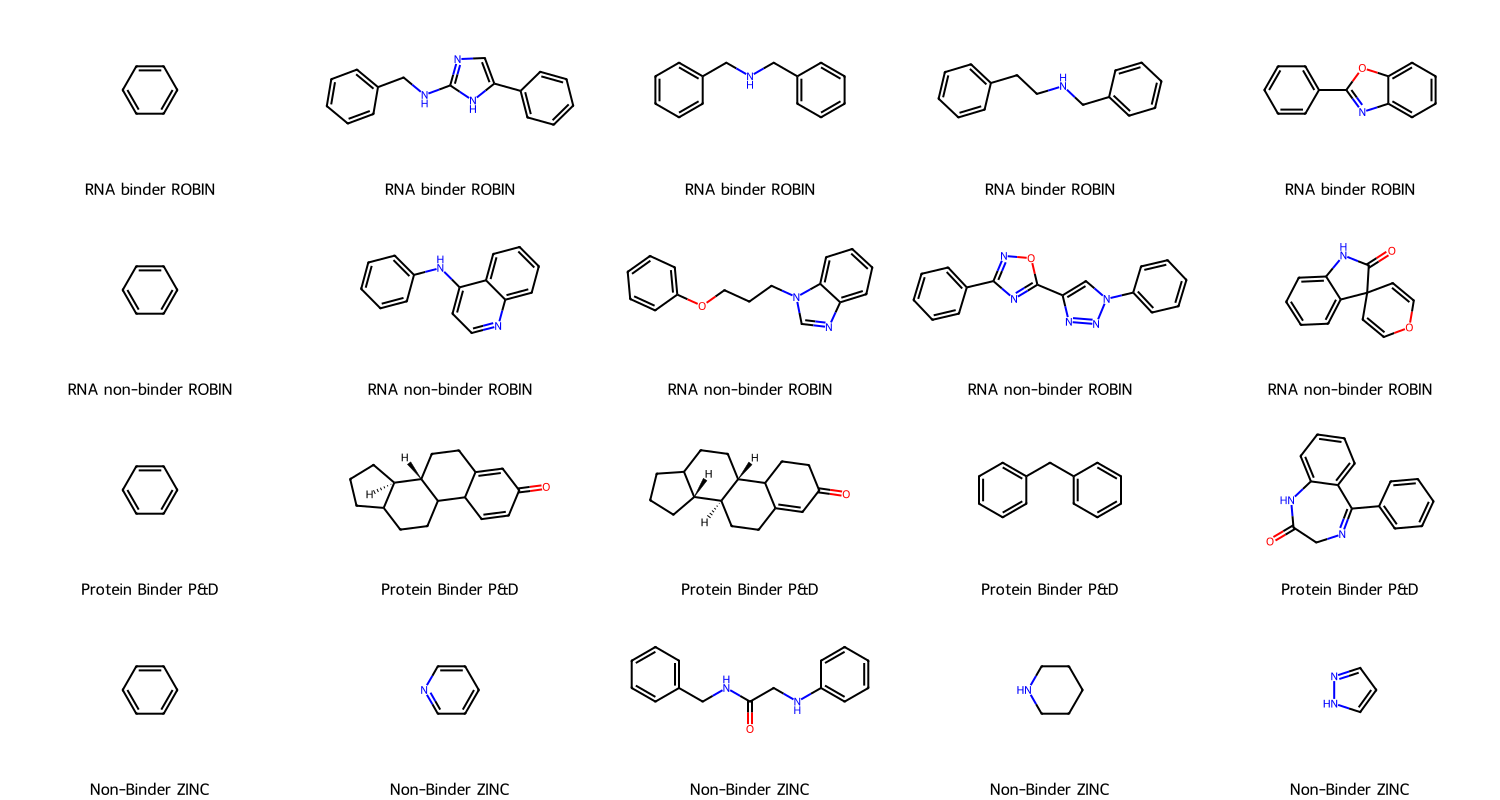

In [31]:
# Visualize most common scaffolds murcko

# Visualize most common scaffolds and their counts
molecules = [Chem.MolFromSmiles(smiles) for smiles in scaffold_counts_murcko['Murcko_scafold']]

# Legends need to include the count and the formatted ratio/source string
# legends = [
#     f"{count}: {ratio} ({source})"
#     for count, ratio, source in zip(scaffold_counts_murcko['count'], scaffold_counts_murcko['ratio_to_the_sum(scaffolds)'], scaffold_counts_murcko['source'])
# ]

legends = [
    f"{source}"
    for source in scaffold_counts_murcko['source']
]

# Create the image grid with the specified options
img_ls_mrc = Draw.MolsToGridImage(
    molecules,
    molsPerRow=5,
    subImgSize=(300, 200),
    useSVG=True,
    legends=legends
)

# Display the grid (depends on your environment; might differ in a notebook or a script)
img_ls_mrc

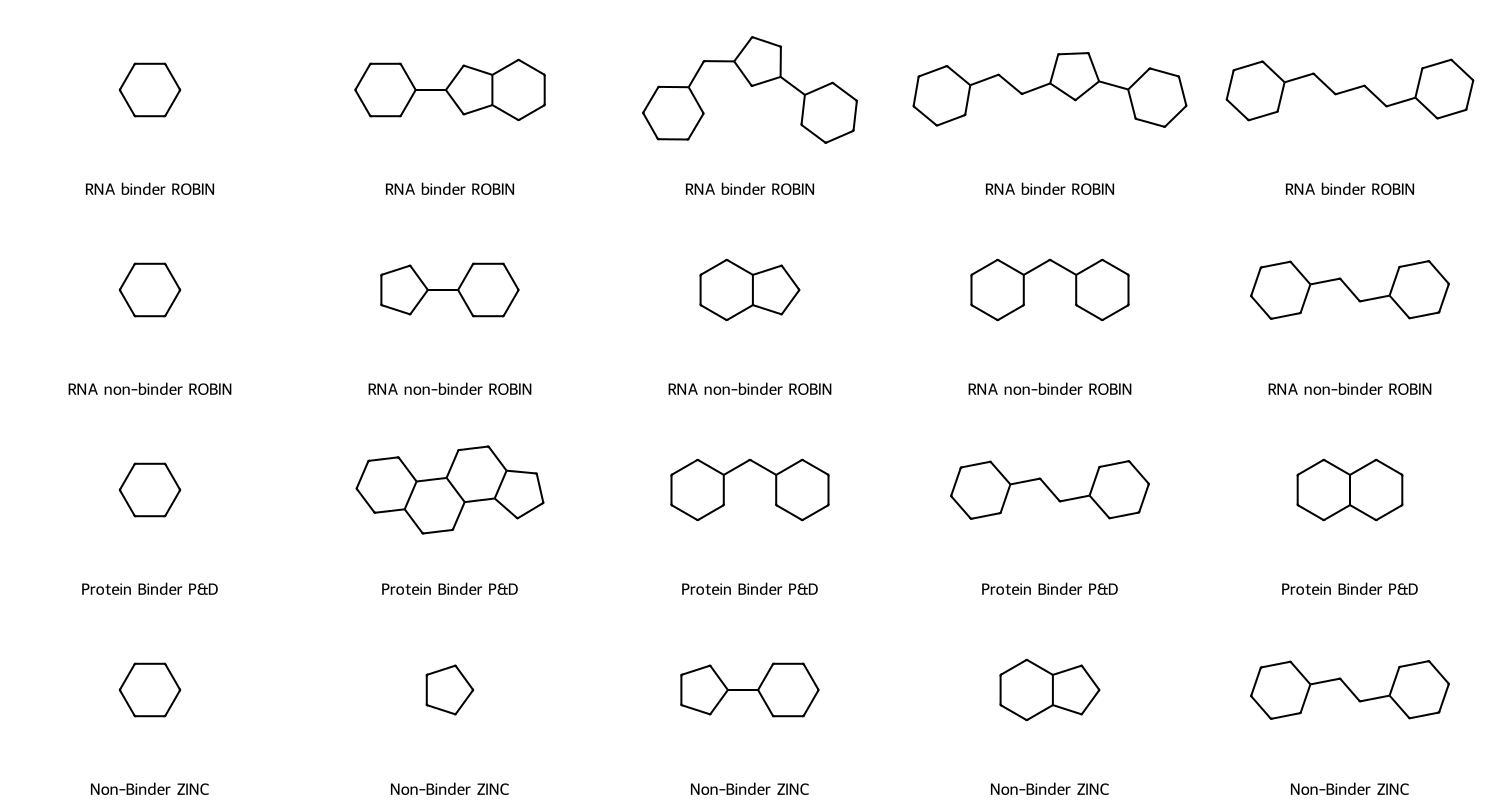

In [32]:
# Assuming scaffold_counts_csk dataframe is properly set with necessary columns
# Generate molecule objects from SMILES strings
molecules_csk = [Chem.MolFromSmiles(smiles) for smiles in scaffold_counts_csk['CSK_scafold']]

# Legends need to include the formatted ratio/source string
# legends = [
#     f"{count}: {ratio} ({source})"
#     for count, ratio, source in zip(scaffold_counts_csk['count'], scaffold_counts_csk['ratio_to_the_sum(scaffolds)'], scaffold_counts_murcko['source'])
# ]

legends = [
    f"{source}"
    for source in scaffold_counts_csk['source']
]


# Create the image grid with the specified options
img_ls_csk = Draw.MolsToGridImage(
    molecules_csk,
    molsPerRow=5,
    subImgSize=(300, 200),
    useSVG=True,
    legends=legends
)

# Display the grid (depends on your environment; might differ in a notebook or a script)
img_ls_csk
